<a href="https://colab.research.google.com/github/jayeshp19/091_JayeshParmar/blob/main/lab%204/091_Lab4_WeatherEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Try the algo on Same Whether dataset - OneHotEncoding of features: and Train test Division 75%-25%

---



Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

Preparing Dataset

In [2]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

Digitize dataset using encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(X)

encoded_x = OneHotEncoder().fit_transform(X).toarray()
print(encoded_x)

le = LabelEncoder()
encoded_y = le.fit_transform(Play)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


Merge different features to prepare dataset

In [4]:
#Create a tuples of different values
print('Features  :  \n')
for pair in encoded_x:
  print(pair)

Features  :  

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size = 0.25, random_state = 90)
print(x_train)

[[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]]


train 'Create and train DecisionTreeClassifier'

In [6]:
from sklearn import metrics

dtc_obj = DecisionTreeClassifier(criterion = 'entropy')
dtc_obj.fit(x_train, y_train)
y_pred = dtc_obj.predict(x_test)

print('Accuracy  :  ', metrics.accuracy_score(y_test, y_pred))

Accuracy  :   1.0


Predict output for new data

In [7]:
print(x_test)

print('\ny predicted  :  ', y_pred)
print(f'Actual y test  :  {y_test}')

[[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]]

y predicted  :   [0 1 1 1]
Actual y test  :  [0 1 1 1]


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 3]])

In [9]:
from sklearn.metrics import precision_score, recall_score

print(metrics.classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Confusion Matrix  :  
[[1 0]
 [0 3]]


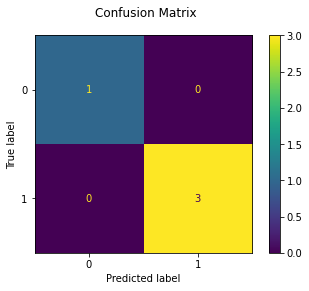

In [10]:
disp = metrics.plot_confusion_matrix(dtc_obj, x_test, y_test)
disp.figure_.suptitle('Confusion Matrix')
print(f'Confusion Matrix  :  \n{disp.confusion_matrix}')

plt.show()

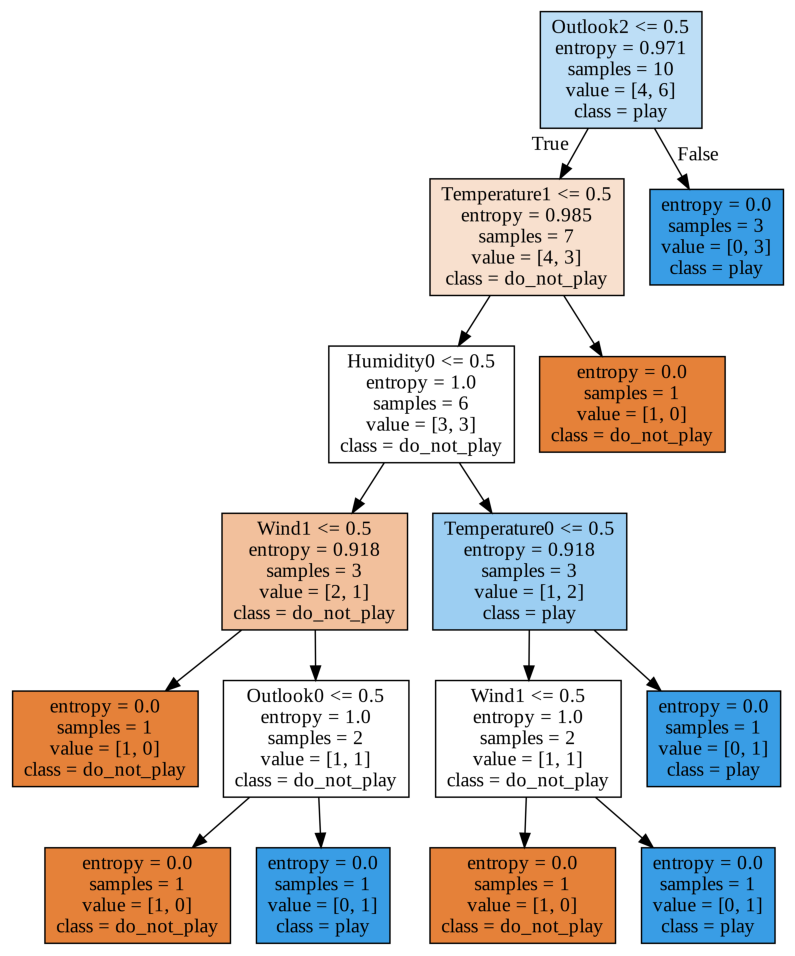

In [11]:
from subprocess import call
export_graphviz(dtc_obj, out_file='tree_entropy.dot', 
                feature_names = ['Outlook2', 'Outlook1', 'Outlook0', 'Temperature2', 'Temperature1', 'Temperature0', 'Humidity1', 'Humidity0', 'Wind1', 'Wind0'], 
                class_names = ['do_not_play', 'play'], 
                filled = True)

#convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();